In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data={
    'Date':pd.date_range(start='2023-01-01',periods=20,freq='D'),
    'Product Name':['Product A','Product B','Product C','Product D','Product E'] * 4,
    'Units Sold':np.random.randint(1,20,size=20),
    'Revenue':np.random.randint(100, 1000, size=20),
    'Region':['North','South','East','West'] * 5,
    'Discount Offered (%)': [14, 4, 20, 22, 6, 21, 0, 10, 0, 27, 10, 16, 28, 6, 2, 27, 25, 14, 7, 26],
    'Salesperson':['Alice','Bob','Charlie','David','Eve']*4
}
df=pd.DataFrame(data)
df['Revenue After Discount']=df['Revenue']*(1 - df['Discount Offered (%)']/100)
df

,Date,Product Name,Units Sold,Revenue,Region,Discount Offered (%),Salesperson,Revenue After Discount
0,2023-01-01,Product A,17,296,North,14,Alice,254.56
1,2023-01-02,Product B,16,196,South,4,Bob,188.16
2,2023-01-03,Product C,5,966,East,20,Charlie,772.80
3,2023-01-04,Product D,11,697,West,22,David,543.66
4,2023-01-05,Product E,11,148,North,6,Eve,139.12
5,2023-01-06,Product A,1,520,South,21,Alice,410.80
6,2023-01-07,Product B,1,465,East,0,Bob,465.00
7,2023-01-08,Product C,5,101,West,10,Charlie,90.90
8,2023-01-09,Product D,7,431,North,0,David,431.00
9,2023-01-10,Product E,14,267,South,27,Eve,194.91


# 1.	What are the top 3 sales transactions with the highest revenue?

In [5]:
df.sort_values(by='Revenue',ascending=False).head(3)

,Date,Product Name,Units Sold,Revenue,Region,Discount Offered (%),Salesperson,Revenue After Discount
12,2023-01-13,Product C,2,968,North,28,Charlie,696.96
2,2023-01-03,Product C,5,966,East,20,Charlie,772.80
18,2023-01-19,Product D,11,769,East,7,David,715.17


# 2.	How many units of each product were sold?

In [7]:
df['Product Name'].value_counts()

Product Name
Product A    4
Product B    4
Product C    4
Product D    4
Product E    4
Name: count, dtype: int64

# 3.	What is the total revenue after applying discounts?

In [68]:
total_revenue_after_discount=df['Revenue After Discount'].sum()
total_revenue_after_discount

8844.22

# 4.	Which sales transaction had the highest discount offered, and how much revenue did it generate after applying the discount?

In [69]:
maxdisc=df['Discount Offered (%)'].max()
df[df['Discount Offered (%)']==maxdisc]
max_discount_row = df[df['Discount Offered (%)'] == maxdisc]
max_discount_row

,Date,Product Name,Units Sold,Revenue,Region,Discount Offered (%),Salesperson,Revenue After Discount
12,2023-01-13,Product C,1,270,North,28,Charlie,194.4


In [70]:
print(max_discount_row['Revenue After Discount'])

12    194.4
Name: Revenue After Discount, dtype: float64


# 5.	Which salesperson generated the highest total revenue?

In [71]:
df.groupby('Salesperson')['Revenue'].sum().idxmax()

'Bob'

# 6.What is the average discount offered by each salesperson?


In [72]:
df.groupby('Salesperson')['Discount Offered (%)'].mean()

Salesperson
Alice      18.00
Bob        11.25
Charlie    18.00
David       8.75
Eve        15.25
Name: Discount Offered (%), dtype: float64

# 7.	How much revenue was generated in each region?

In [73]:
df.groupby('Region')['Revenue'].sum()

Region
East     3392
North    2447
South    2313
West     2125
Name: Revenue, dtype: int32

# 8.	In which region did Alice generate the highest sales?

In [74]:
alice=df[df['Salesperson']=='Alice']
alice.loc[alice['Revenue'].idxmax(),'Region']

'South'

# 9.	Which product generated the highest revenue per unit sold?

In [75]:
df['Rpu']=df['Revenue']/df['Units Sold']
df.loc[df['Rpu'].idxmax(),'Product Name']

'Product C'

# 10.	How many transactions were rated as "High" performance?

In [76]:
df2=df[df['Revenue']>500]
df2.shape[0]

11

# 11.	Which salesperson sold the most units in the North region without offering any discount?

In [77]:
north_sales_no_discount = df[(df['Region'] == 'North') & (df['Discount Offered (%)'] == 0)]
top_salesperson_north = north_sales_no_discount.groupby('Salesperson')['Units Sold'].sum().idxmax()
top_salesperson_north

'David'

# 12.	What is the average revenue per unit sold in each region for each product?



In [78]:
df.groupby(['Region', 'Product Name'])['Rpu'].mean() 

Region  Product Name
East    Product A       103.500000
        Product B       104.222222
        Product C        70.083333
        Product D        29.777778
        Product E        41.500000
North   Product A        62.166667
        Product B       121.833333
        Product C       270.000000
        Product D        72.416667
        Product E        68.000000
South   Product A        78.818182
        Product B        65.125000
        Product C         8.764706
        Product D        40.000000
        Product E        67.000000
West    Product A        16.750000
        Product B        48.333333
        Product C       179.000000
        Product D       239.000000
        Product E        43.500000
Name: Rpu, dtype: float64

# 13.	Which salesperson has the highest average revenue after discounts, and how does it compare between regions?

In [79]:
df.groupby('Salesperson')['Revenue After Discount'].mean().idxmax()

'Bob'

In [80]:
df.groupby(['Salesperson','Region'])['Revenue After Discount'].mean()

Salesperson  Region
Alice        East      745.20
             North     320.78
             South     684.93
             West       97.82
Bob          East      938.00
             North     548.25
             South     500.16
             West      609.00
Charlie      East      672.80
             North     194.40
             South     128.14
             West      161.10
David        East      498.48
             North     869.00
             South     225.60
             West      372.84
Eve          East      244.02
             North     191.76
             South     391.28
             West      450.66
Name: Revenue After Discount, dtype: float64

# 14.	What is the cumulative total revenue over time for each salesperson?

In [81]:
df14=df.sort_values(by=['Salesperson', 'Date'])
df14['Cumulative Revenue'] = df14.groupby('Salesperson')['Revenue'].cumsum()
df14

,Date,Product Name,Units Sold,Revenue,Region,Discount Offered (%),Salesperson,Revenue After Discount,Rpu,Cumulative Revenue
0,2023-01-01,Product A,6,373,North,14,Alice,320.78,62.166667,373
5,2023-01-06,Product A,11,867,South,21,Alice,684.93,78.818182,1240
10,2023-01-11,Product A,8,828,East,10,Alice,745.20,103.500000,2068
15,2023-01-16,Product A,8,134,West,27,Alice,97.82,16.750000,2202
1,2023-01-02,Product B,8,521,South,4,Bob,500.16,65.125000,521
6,2023-01-07,Product B,9,938,East,0,Bob,938.00,104.222222,1459
11,2023-01-12,Product B,15,725,West,16,Bob,609.00,48.333333,2184
16,2023-01-17,Product B,6,731,North,25,Bob,548.25,121.833333,2915
2,2023-01-03,Product C,12,841,East,20,Charlie,672.80,70.083333,841
7,2023-01-08,Product C,1,179,West,10,Charlie,161.10,179.000000,1020


# 15.	For each salesperson, rank the transactions by revenue, and find the top 2 transactions for each.

In [82]:
df['Revenue Rank']=df.groupby('Salesperson')['Revenue'].rank(ascending=False)
Top2=df[df['Revenue Rank']<=2]
Top2

,Date,Product Name,Units Sold,Revenue,Region,Discount Offered (%),Salesperson,Revenue After Discount,Rpu,Revenue Rank
2,2023-01-03,Product C,12,841,East,20,Charlie,672.80,70.083333,1.0
5,2023-01-06,Product A,11,867,South,21,Alice,684.93,78.818182,1.0
6,2023-01-07,Product B,9,938,East,0,Bob,938.00,104.222222,1.0
8,2023-01-09,Product D,12,869,North,0,David,869.00,72.416667,1.0
9,2023-01-10,Product E,8,536,South,27,Eve,391.28,67.000000,2.0
10,2023-01-11,Product A,8,828,East,10,Alice,745.20,103.500000,2.0
12,2023-01-13,Product C,1,270,North,28,Charlie,194.40,270.000000,2.0
16,2023-01-17,Product B,6,731,North,25,Bob,548.25,121.833333,2.0
18,2023-01-19,Product D,18,536,East,7,David,498.48,29.777778,2.0
19,2023-01-20,Product E,14,609,West,26,Eve,450.66,43.500000,1.0


# 16.	How has the total revenue generated by each product changed over time? Show cumulative revenue for each product per day.

In [83]:
df14=df.sort_values(by=['Product Name', 'Date'])
df14['Cumulative_Revenue_Product'] = df14.groupby('Salesperson')['Revenue'].cumsum()
df14[['Date','Product Name','Cumulative_Revenue_Product']]

,Date,Product Name,Cumulative_Revenue_Product
0,2023-01-01,Product A,373
5,2023-01-06,Product A,1240
10,2023-01-11,Product A,2068
15,2023-01-16,Product A,2202
1,2023-01-02,Product B,521
6,2023-01-07,Product B,1459
11,2023-01-12,Product B,2184
16,2023-01-17,Product B,2915
2,2023-01-03,Product C,841
7,2023-01-08,Product C,1020


# 17.	Analyze how discounts affect revenue. For each product, what is the average revenue generated with a discount compared to without a discount?

In [84]:
print("Avg revenue without discount")
df.groupby('Product Name')['Revenue'].mean()

Avg revenue without discount


Product Name
Product A    550.50
Product B    728.75
Product C    359.75
Product D    530.75
Product E    399.50
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Avg revenue without discount')

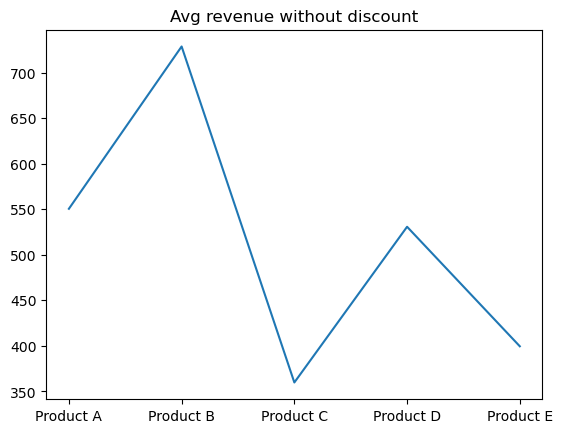

In [85]:
plt.plot(df.groupby('Product Name')['Revenue'].mean())
plt.title("Avg revenue without discount")

In [86]:
print("Avg revenue with discount")
df.groupby('Product Name')['Revenue After Discount'].mean()

Avg revenue with discount


Product Name
Product A    462.1825
Product B    648.8525
Product C    289.1100
Product D    491.4800
Product E    319.4300
Name: Revenue After Discount, dtype: float64

Text(0.5, 1.0, 'Avg revenue with discount')

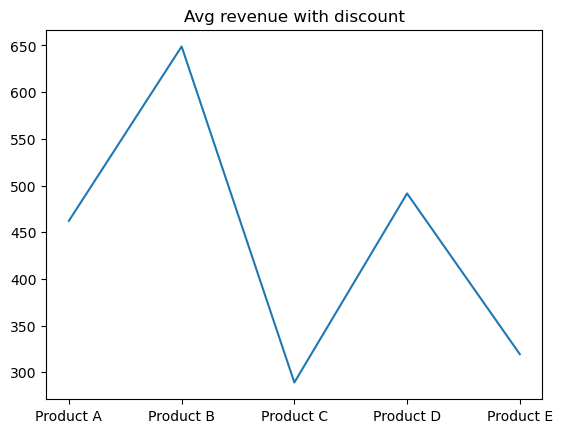

In [87]:
plt.plot(df.groupby('Product Name')['Revenue After Discount'].mean())
plt.title("Avg revenue with discount")

# 18.	What is the weighted average discount offered by each salesperson, weighted by the revenue they generated?

In [12]:
df['Weighted Discount']=df['Discount Offered (%)']*(df['Revenue']/df['Revenue'].sum())
weighted_average_discount=df.groupby('Salesperson').agg({'Weighted Discount': 'sum'}).reset_index()
weighted_average_discount

,Salesperson,Weighted Discount
0,Alice,2.878383
1,Bob,0.750740
2,Charlie,5.885833
3,David,2.767503
4,Eve,1.930864


# 19.	What percentage of the total revenue does each region contribute? Compare it to the total revenue per region.

In [89]:
total_revenue_per_region=df.groupby('Region')['Revenue'].sum().reset_index()
total_revenue=total_revenue_per_region['Revenue'].sum()
total_revenue_per_region['Percentage Contribution']=(total_revenue_per_region['Revenue'] / total_revenue) * 100
total_revenue_per_region


,Region,Revenue,Percentage Contribution
0,East,3392,33.005741
1,North,2447,23.810451
2,South,2313,22.506568
3,West,2125,20.677240
